1)We will first mount the Google Drive and then load the necessary libraries.

In [17]:
#Mounting the google drive
from google.colab import drive
from google.colab import files
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/")



import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from matplotlib.ticker import ScalarFormatter
from datetime import datetime
from scipy.stats import pearsonr

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
#Creating Data frame
telecom= pd.read_csv('telecom_trinity.csv')

In [19]:
telecom

,company name,year,market capitalisation,total debt,enterprise value,revenue adjusted,gross profit adjusted,EBIDTA adjusted,net income adjusted,EPS adjusted,...,ESG score,encironmental disclosure score,social disclosure score,governance disclosure score,number of employees,ASCI customer satisfaction score,inventory,churn rate %,inventory turnover,average inventory processing period (days)
0,AT&T Inc,2018,207817700.0,176505000.0,388913700.0,170756000.0,91337000.0,56956000.0,19370000.0,3.28,...,71.13,61.91,51.36,100.00,268220.0,73,2771000,1.12,31.79,13
1,AT&T Inc,2019,283508000.0,188402000.0,477493000.0,181193000.0,97052000.0,52645000.0,13903000.0,2.25,...,70.43,60.50,51.36,99.31,247800.0,73,2864000,1.18,29.86,12
2,AT&T Inc,2020,204941500.0,182984000.0,395752500.0,143050000.0,77399000.0,43610000.0,-5176000.0,1.80,...,70.51,60.50,51.60,99.31,230760.0,73,3695000,0.98,20.02,17
3,AT&T Inc,2021,175670200.0,199225000.0,373195200.0,134038000.0,73631000.0,49707000.0,20081000.0,3.05,...,72.24,60.50,56.80,99.31,202600.0,74,3325000,0.94,17.21,16
4,AT&T Inc,2022,131219000.0,158226000.0,294701000.0,120741000.0,69893000.0,44519000.0,-8524000.0,2.79,...,71.91,63.06,53.26,99.31,163471.0,73,3123000,0.97,15.77,22
5,T-Mobile US Inc,2018,54080000.0,30104000.0,82981000.0,43310000.0,24956000.0,12009000.0,2969000.0,3.45,...,51.72,40.05,21.19,93.74,52000.0,76,1084000,1.01,13.85,22
6,T-Mobile US Inc,2019,67198500.0,42334000.0,108004500.0,44998000.0,26477000.0,15518000.0,3985600.0,4.61,...,52.29,41.77,21.19,93.74,53000.0,76,964000,0.89,18.09,19
7,T-Mobile US Inc,2020,167457500.0,107247000.0,264319500.0,68397000.0,40783000.0,28021000.0,5245900.0,4.54,...,60.19,46.09,34.31,100.00,75000.0,72,2527000,0.90,15.82,33
8,T-Mobile US Inc,2021,144883800.0,106572000.0,244824800.0,80118000.0,45546000.0,32324000.0,5640500.0,4.50,...,60.19,46.09,34.31,100.00,75000.0,73,2567000,0.98,13.57,26
9,T-Mobile US Inc,2022,172754400.0,111792000.0,280039400.0,79571000.0,47559000.0,33759000.0,8160300.0,6.50,...,63.20,48.14,41.32,100.00,71000.0,74,1884000,0.88,14.38,19


2)Some values are in integer and some are in float because of which errors might occur. The following code will convert all the numeric values in 1 form.

In [20]:
numeric_columns = telecom.select_dtypes(include=['number']).columns
telecom[numeric_columns] = telecom[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [21]:
telecom.isnull().sum()

company name                                  0
year                                          0
market capitalisation                         0
total debt                                    0
enterprise value                              0
revenue adjusted                              0
gross profit adjusted                         0
EBIDTA adjusted                               0
net income adjusted                           0
EPS adjusted                                  0
capital expenditures                          0
free cash flow                                0
total wireless subscribers                    0
ESG score                                     0
encironmental disclosure score                0
social disclosure score                       0
governance disclosure score                   0
number of employees                           0
ASCI customer satisfaction score              0
inventory                                     0
churn rate %                            

3)The following code will remove the commas in the numeric values

In [22]:
output_file = 'telecom_trinity.csv'
telecom.replace(',', '', regex=True, inplace=True)
telecom.to_csv(output_file, index=False)

4)This heatmap shows a correlation between the variables.

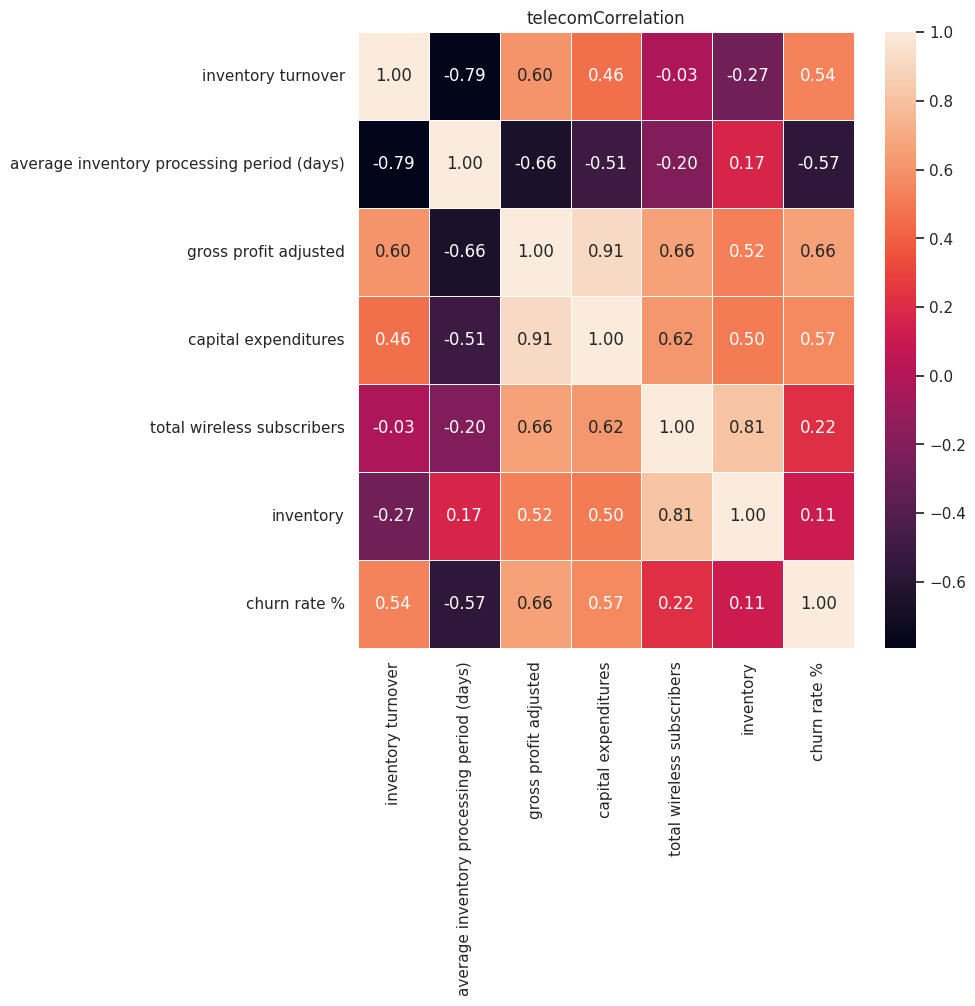

In [23]:
correlation_telecom = telecom[['inventory turnover','average inventory processing period (days)',
                               'gross profit adjusted', 'capital expenditures',
                               'total wireless subscribers', 'inventory', 'churn rate %']].corr(numeric_only=False)
plt.figure(figsize=(8, 8))
sbn.heatmap(correlation_telecom, annot=True, fmt=".2f", linewidths=0.5)
plt.title('telecomCorrelation')
plt.show()

5)Code for visualising churn rate

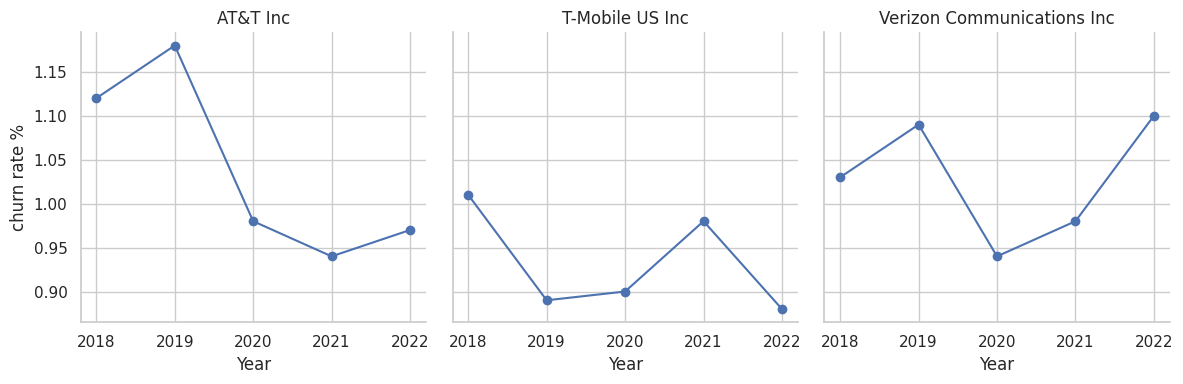

In [24]:
sbn.set(style="whitegrid")
churn = sbn.FacetGrid(telecom, col="company name", col_wrap=3, height=4)
churn.map(plt.plot, "year", "churn rate %", marker='o')
churn.set_axis_labels('Year', 'churn rate %')
churn.set_titles(col_template="{col_name}")
plt.show()

6)Code for visualising ASCI score

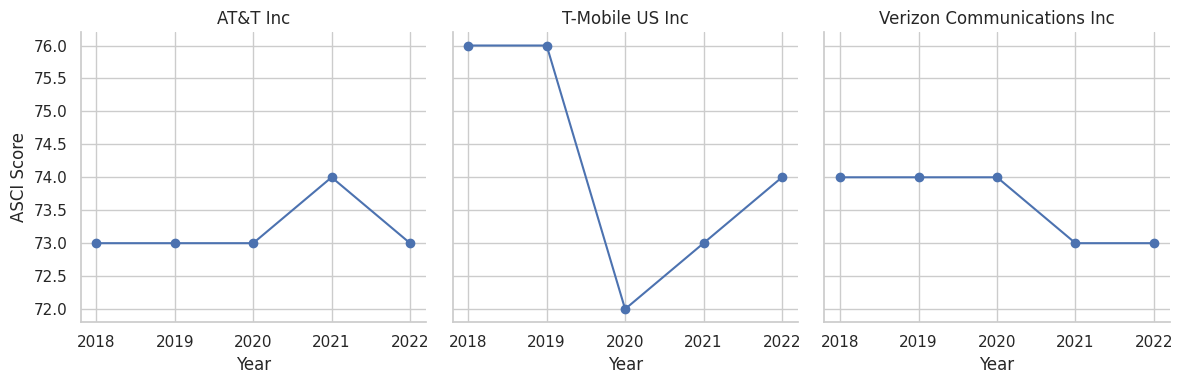

In [25]:
sbn.set(style="whitegrid")
ASCIscore = sbn.FacetGrid(telecom, col="company name", col_wrap=3, height=4)
ASCIscore.map(plt.plot, "year",'ASCI customer satisfaction score', marker='o')
ASCIscore.set_axis_labels('Year', 'ASCI Score')
ASCIscore.set_titles(col_template="{col_name}")
plt.show()

7)Code for visualising number of subscribers

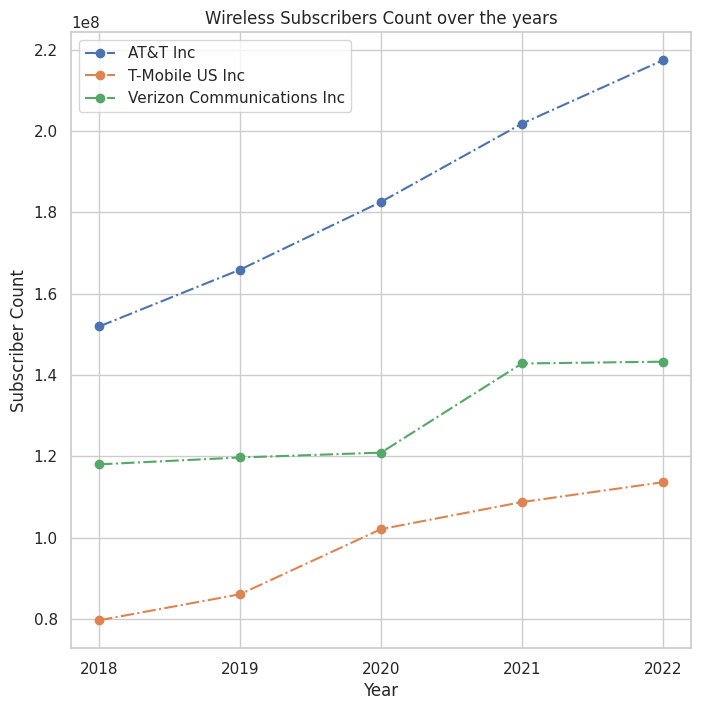

In [26]:
companies = telecom['company name'].unique()
sorted_years = sorted(telecom['year'].unique())
plt.figure(figsize=(8, 8))
for company in companies:
    company_data = telecom[telecom['company name'] == company]
    plt.plot(company_data['year'], company_data['total wireless subscribers'],
             linestyle='-.', marker='o',label=company)
plt.xlabel('Year')
plt.ylabel('Subscriber Count')
plt.title('Wireless Subscribers Count over the years')
plt.xticks(sorted_years)
plt.legend()
plt.show()

8)Code for visualising for facetgrid for comparison of Average inventory processing period and inventory turnover

<Figure size 2000x2000 with 0 Axes>

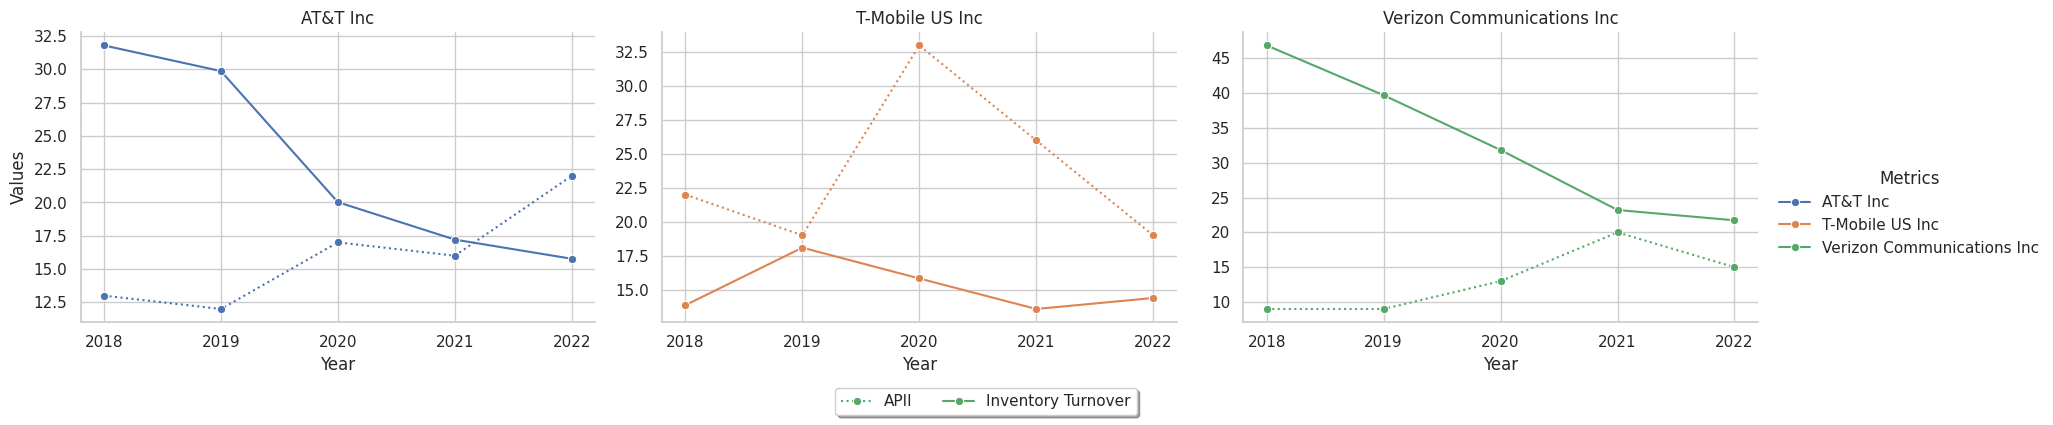

In [27]:
plt.figure(figsize=(20, 20))
telecom= telecom.sort_values(by='year')
apii_turn = sbn.FacetGrid(telecom, col="company name", col_wrap=3, height=4, aspect=1.5,
                          sharex=False, sharey=False, margin_titles=True,
                          col_order=telecom['company name'].unique(), hue='company name')
apii_turn.map(sbn.lineplot, "year", "average inventory processing period (days)",
              linestyle=':',marker = 'o', label='APII')
apii_turn.map(sbn.lineplot, "year", "inventory turnover", marker='o', label='Inventory Turnover')
apii_turn.set_titles("{col_name}")
apii_turn.set_axis_labels("Year", "Values")
apii_turn.add_legend(title='Metrics')
line_legend = plt.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.20), fancybox=True, shadow=True, ncol=2)
line_legend.get_texts()[0].set_text('APII')
line_legend.get_texts()[1].set_text('Inventory Turnover')
apii_turn.set(xticks=telecom['year'].unique(), xticklabels=telecom['year'].unique())

plt.show()

9)Code for visualising year on year growth

<Figure size 800x600 with 0 Axes>

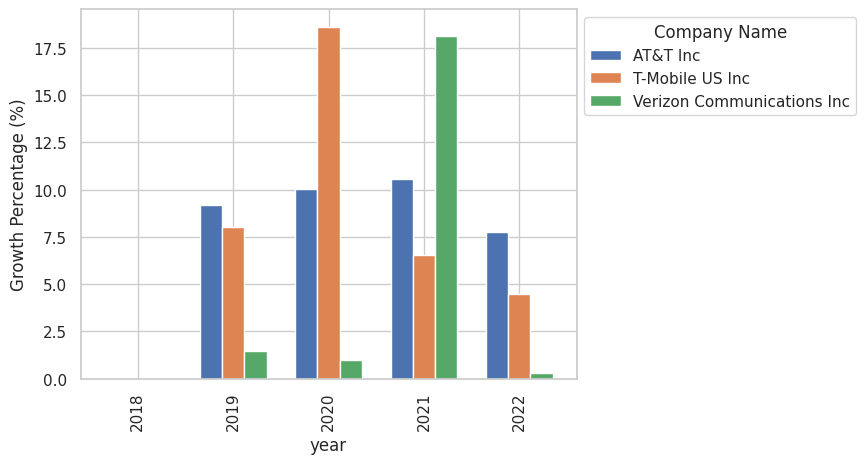

company name   AT&T Inc  T-Mobile US Inc  Verizon Communications Inc
year                                                                
2018                NaN              NaN                         NaN
2019           9.194252         8.028776                    1.434758
2020          10.048285        18.615624                    0.992548
2021          10.535282         6.520419                   18.138650
2022           7.733744         4.487716                    0.313012


In [28]:
telecom = telecom.sort_values(by=['company name', 'year'])
telecom['year_subscriber_growth_percentage'] = telecom.groupby('company name')['total wireless subscribers'].pct_change() * 100
pivot_telecom = telecom.pivot(index='year', columns='company name', values='year_subscriber_growth_percentage')
plt.figure(figsize=(8, 6))
pivot_telecom.plot(kind='bar', width=0.7)
plt.xlabel('year')
plt.ylabel('Growth Percentage (%)')
plt.legend(title='Company Name',bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
print(pivot_telecom)

10)correlation graphs

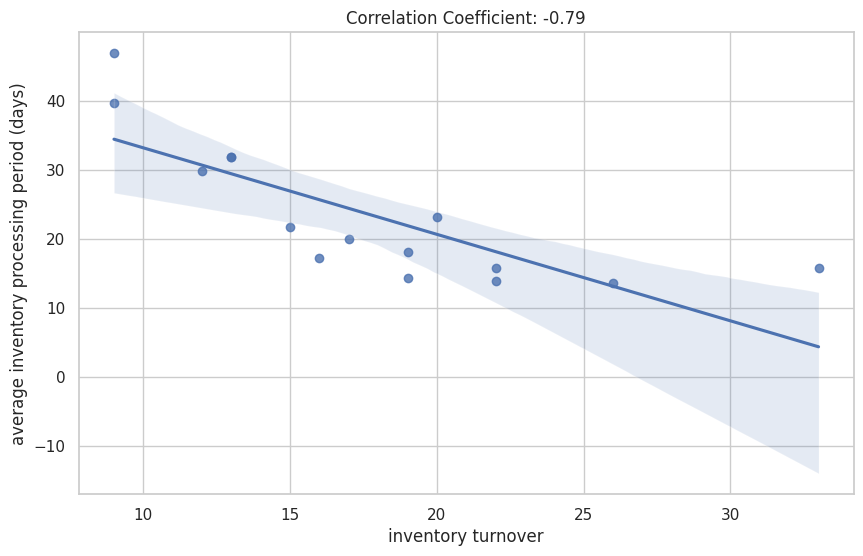

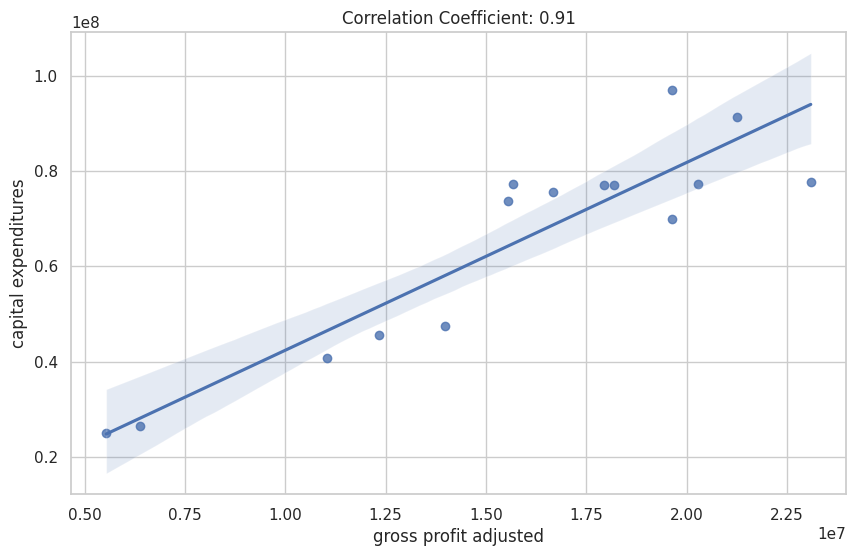

In [29]:
correlation_inventory_turnover_aipp = telecom['average inventory processing period (days)'].corr(telecom['inventory turnover'])

plt.figure(figsize=(10, 6))
sbn.regplot(x='average inventory processing period (days)', y='inventory turnover', data=telecom)
plt.title(f'Correlation Coefficient: {correlation_inventory_turnover_aipp:.2f}')
plt.xlabel('inventory turnover')
plt.ylabel('average inventory processing period (days)')
plt.show()



correlation_inventory_turnover_aipp = telecom['capital expenditures'].corr(telecom['gross profit adjusted'])

plt.figure(figsize=(10, 6))
sbn.regplot(x='capital expenditures', y='gross profit adjusted', data=telecom)
plt.title(f'Correlation Coefficient: {correlation_inventory_turnover_aipp:.2f}')
plt.xlabel('gross profit adjusted')
plt.ylabel('capital expenditures')
plt.show()

11)OLS

In [14]:
import pandas as pd
import statsmodels.api as sm


a = telecom[['capital expenditures', 'inventory turnover', 'year']]

a = sm.add_constant(a)


b = telecom['gross profit adjusted']


model = sm.OLS(b, a).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     gross profit adjusted   R-squared:                       0.903
Model:                               OLS   Adj. R-squared:                  0.876
Method:                    Least Squares   F-statistic:                     33.96
Date:                   Wed, 13 Dec 2023   Prob (F-statistic):           7.42e-06
Time:                           13:03:28   Log-Likelihood:                -257.20
No. Observations:                     15   AIC:                             522.4
Df Residuals:                         11   BIC:                             525.2
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


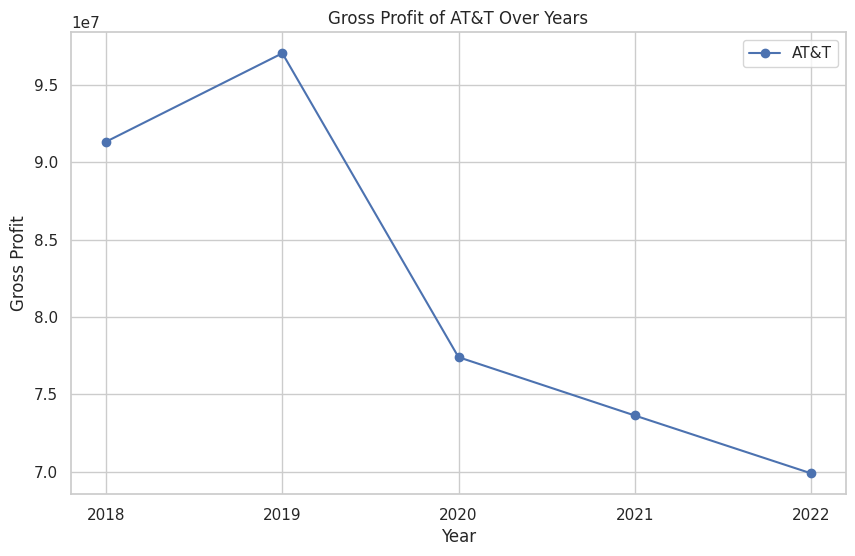

In [30]:

sorted_years = sorted(telecom['year'].unique())

att_df = telecom[telecom['company name'] == 'AT&T Inc']

plt.figure(figsize=(10, 6))
plt.plot(sorted_years, att_df['gross profit adjusted'], marker='o', linestyle='-', color='b', label='AT&T')
plt.title('Gross Profit of AT&T Over Years')
plt.xlabel('Year')
plt.ylabel('Gross Profit')
plt.xticks(att_df['year'].unique())
plt.legend()
plt.grid(True)
plt.show()

12)Prediction multi linear regression model

In [31]:
#Code for AT&T
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

att_df = telecom[(telecom['company name'] == 'AT&T Inc') & (telecom['year'] != 2022)]

X = att_df[['year', 'capital expenditures','inventory turnover']]
y = att_df['gross profit adjusted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
ATT_2022 = pd.DataFrame({'year': [2022], 'capital expenditures': [19626000],'inventory turnover': [15.77]})
predicted_2022_ATT = model.predict(ATT_2022)

print(f'Predicted gross profit for AT&T in 2022 is : {predicted_2022_ATT[0]}')

#Code for T-Mobile
tmobile_df = telecom[(telecom['company name'] == 'T-Mobile US Inc') & (telecom['year'] != 2022)]

X = tmobile_df[['year', 'capital expenditures','inventory turnover']]
y = tmobile_df['gross profit adjusted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
TMOBILE_2022 = pd.DataFrame({'year': [2022], 'capital expenditures': [13970000],'inventory turnover': [14.38]})
predicted_2022_TMOBILE = model.predict(TMOBILE_2022)

print(f'Predicted gross profit for T-Mobile in 2022 is : {predicted_2022_TMOBILE[0]}')

#Code for Verizon
verizon_df = telecom[(telecom['company name'] == 'Verizon Communications Inc') & (telecom['year'] != 2022)]

X = verizon_df[['year', 'capital expenditures','inventory turnover']]
y = verizon_df['gross profit adjusted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
VERIZON_2022 = pd.DataFrame({'year': [2022], 'capital expenditures': [23087000],'inventory turnover': [21.73]})
predicted_2022_VERIZON = model.predict(VERIZON_2022)
print(f'Predicted gross profit for Verizon in 2022 is : {predicted_2022_VERIZON[0]}')

Predicted gross profit for AT&T in 2022 is : 70768370.43345428
Predicted gross profit for T-Mobile in 2022 is : 50230396.36932713
Predicted gross profit for Verizon in 2022 is : 76166618.67693976
